In [2]:
import numpy as np
import pandas as pd
import nltk
import spacy
import requests
from bs4 import BeautifulSoup
import time
import re
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize

In [8]:
# Download necessary NLTK data
nltk.download('punkt')

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data=pd.read_csv('/content/spam.csv', encoding='latin-1')
# Drop unnecessary columns and rename the necessary ones
df = data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
df.columns = ['label', 'text']
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:

def most_frequent_words(df, all_words, amount):

  # Remove punctuation and split into words
  words = re.findall(r'\b\w+\b', all_words)

  # Get the 5 most common words
  most_common_words = Counter(words).most_common(5)
  print("5 most frequent words:")
  for word, freq in most_common_words:
      print(f"{word}: {freq}")

def count_of_words_apear_once(df, all_words):

  # Combine all text into a single string
  words = re.findall(r'\b\w+\b', all_words)
  # Count word frequencies
  word_freq = Counter(words)

  # Count words that appear only once
  unique_words = sum(1 for word, freq in word_freq.items() if freq == 1)
  print(f"Number of words that only appear once: {unique_words}")

def avg_words_per_message(df, column):
  df['word_count'] = df[column].apply(lambda x: len(x.split()))
  average_words = df['word_count'].mean()
  print(f"Average number of words per message: {average_words:.2f}")

def total_num_of_data(df):
  total_messages = len(df)
  print(f"Total number of messages: {total_messages}")

  # Function to print word statistics
def print_word_statistics(text):
    str = " ".join(text)
    words = word_tokenize(str)
    total_words = len(words)
    unique_words = len(set(words))
    word_freq = Counter(words)
    most_common_words = word_freq.most_common(10)

    print(f"Total words: {total_words}")
    print(f"Unique words: {unique_words}")

# **Basic Analysis - Before Proccessing**

In [ ]:
num_spam = len(df[df['label'] == 'spam'])
num_ham = len(df[df['label'] == 'ham'])
print(f"Number of spam messages: {num_spam}")
print(f"Number of ham messages: {num_ham}")

Number of spam messages: 747
Number of ham messages: 4825


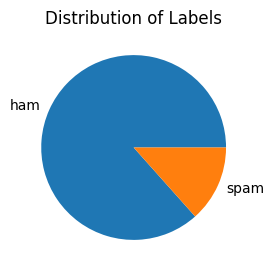

In [ ]:
df.label.value_counts().plot(kind='pie', figsize=(3, 3))
plt.title('Distribution of Labels')
plt.ylabel('')  # This removes the y-label which is not meaningful in a pie chart
plt.show()

In [ ]:
# Combine all text into a single string
all_words = ' '.join(df['text']).lower()

print("---------Before Text Processing-------")
# Total number of messages
total_num_of_data(df)

print_word_statistics(df['text'])

# Average number of words per message
avg_words_per_message(df, 'text')
# 5 most frequent words
most_frequent_words(df, all_words, 5)
# Number of words that only appear once
count_of_words_apear_once(df, all_words)


---------Before Text Processing-------
Total number of messages: 5572
Total words: 104164
Unique words: 11528
Average number of words per message: 15.49
5 most frequent words:
i: 3001
to: 2242
you: 2240
a: 1433
the: 1328
Number of words that only appear once: 4376


# **Text Processing**

# Cleaning The Data

In [11]:
def data_cleaning(df, column):
  # Handle missing values
  df = df.dropna()  # Drop rows with any missing values

  # Convert text to lowercase
  df[column] = df[column].str.lower()

  # Remove punctuation
  df[column] = df[column].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

  # Remove special characters
  df[column] = df[column].apply(lambda x: re.sub(r'[^a-zA-Zא-ת0-9\s]', '', x))

  # Step 6: Remove stop words
  df[column] = df[column].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

  # Use the sub() method to replace URLs with the specified replacement text
  df[column] =df[column].apply(lambda x : re.sub(r'https\S*', '', x))

  # Replace empty strings with NaN
  df[column] = df[column].replace('', pd.NA)

  # Drop rows with NaN values in the specified column
  df = df.dropna(subset=[column])
  # Display the first few rows of the cleaned DataFrame
  print("Cleaned data preview:")
  print(df)
  return df

In [ ]:
df = data_cleaning(df , 'text')

Cleaned data preview:
     label                                               text  word_count
0      ham  go jurong point crazy available bugis n great ...          20
1      ham                            ok lar joking wif u oni           6
2     spam  free entry 2 wkly comp win fa cup final tkts 2...          28
3      ham                u dun say early hor u c already say          11
4      ham        nah dont think goes usf lives around though          13
...    ...                                                ...         ...
5567  spam  2nd time tried 2 contact u u 750 pound prize 2...          30
5568   ham                          b going esplanade fr home           8
5569   ham                        pity mood soany suggestions          10
5570   ham  guy bitching acted like id interested buying s...          26
5571   ham                                     rofl true name           6

[5567 rows x 3 columns]


# **Basic Analysis - After Proccessing**

In [ ]:
# Combine all text into a single string
all_words = ' '.join(df['text']).lower()

print("---------After Text Processing-------")
# Total number of messages
total_num_of_data(df)

print_word_statistics(df['text'])

# Average number of words per message
avg_words_per_message(df, 'text')
# 5 most frequent words
most_frequent_words(df, all_words, 5)
# Number of words that only appear once
count_of_words_apear_once(df, all_words)

---------After Text Processing-------
Total number of messages: 5567
Total words: 52243
Unique words: 9345
Average number of words per message: 9.36
5 most frequent words:
u: 1119
call: 576
2: 478
im: 471
get: 386
Number of words that only appear once: 5138


# Nltk Tokenizer

In [ ]:
from nltk.tokenize import word_tokenize

start_time = time.time()

# Tokenize using NLTK
df['nltk_tokens'] = df['text'].apply(word_tokenize)

nltk_time = time.time() - start_time
print(f"NLTK tokenization time: {nltk_time} seconds")
print(df['nltk_tokens'].head(10))

NLTK tokenization time: 0.5968101024627686 seconds
0    [go, jurong, point, crazy, available, bugis, n...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, 2, wkly, comp, win, fa, cup, fin...
3        [u, dun, say, early, hor, u, c, already, say]
4    [nah, dont, think, goes, usf, lives, around, t...
5    [freemsg, hey, darling, 3, weeks, word, back, ...
6    [even, brother, like, speak, treat, like, aids...
7    [per, request, melle, melle, oru, minnaminungi...
8    [winner, valued, network, customer, selected, ...
9    [mobile, 11, months, u, r, entitled, update, l...
Name: nltk_tokens, dtype: object


# SpaCy Tokenizer


In [ ]:
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English

nlp = English()
tokenizer = Tokenizer(nlp.vocab)
start_time = time.time()
tokens = tokenizer(all_words)
print(list(tokens)[:30])

spacy_time = time.time() - start_time
print(f"spaCy tokenization time: {spacy_time} seconds")

[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat, ok, lar, joking, wif, u, oni, free, entry, 2, wkly, comp, win, fa, cup]
spaCy tokenization time: 0.5070772171020508 seconds


# **NLTK and SpaCy Tokenization comparison**

 NLTK returns a list of strings, which represents a tokenized word, while spaCy returns a list of spaCy token objects.  spaCy's tokenization takes approximately half of the time of NLTK.      
 Language Support:

NLTK:  offers support for tokenization in various languages, although it may require additional configurations or resources for some languages.

spaCy: designed to support multiple languages out of the box, and its tokenization capabilities are optimized for efficiency.

# Lemmatization with Nltk

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
x = all_words.split()
start_time = time.time()

for w in x:
   (w, " : ", lemmatizer.lemmatize(w, pos='n'))
time = time.time() - start_time
time

[nltk_data] Downloading package wordnet to /root/nltk_data...


1.7243921756744385

In [ ]:
print('15 examples of tokens where the token text differs from its lemma')
count = 0
for w in x:
    if w != lemmatizer.lemmatize(w, pos='n'):
        print(w +':' + lemmatizer.lemmatize(w, pos='n'))
        count += 1
        if count >= 15:
            break

15 examples of tokens where the token text differs from its lemma
goes:go
lives:life
weeks:week
aids:aid
callers:caller
friends:friend
hours:hour
months:month
mobiles:mobile
chances:chance
pounds:pound
words:word
times:time
months:month
sucks:suck


# Lemmatization with SpaCy

In [ ]:
import spacy
import time
# Load spaCy model
nlp = spacy.load('en_core_web_sm')


def lemmatize_with_spacy(text):
    doc = nlp(text)
    lemmatized_text = ' '.join([token.lemma_ for token in doc])
    return lemmatized_text

start_time = time.time()
df['lemmatized_spacy'] = df['text'].apply(lemmatize_with_spacy)
spacy_time = time.time() - start_time

print(f"Lemmatization time using spaCy: {spacy_time:.6f} seconds")


Lemmatization time using spaCy: 44.956258 seconds


In [ ]:
# Initialize counter
count = 0
print('15 examples of tokens where the token text differs from its lemma')

# Print 15 examples of tokens where the token text differs from its lemma
for token in nlp(all_words):
    if token.text != token.lemma_:
        print(f"{token.text:>20} : {token.lemma_}")
        count += 1
        if count >= 15:
            break

15 examples of tokens where the token text differs from its lemma
                 got : get
              joking : joke
                  nt : not
                goes : go
               lives : live
               weeks : week
             callers : caller
             friends : friend
              valued : value
            selected : select
               hours : hour
              months : month
            entitled : entitle
              latest : late
             mobiles : mobile


# **NLTK and SpaCy Lemmatization comparison**

The lemmatization process using spaCy took approximately 51.12 seconds, which is significantly slower compared to NLTK. This indicates that while spaCy offers robust NLP capabilities, it may require more processing time for lemmatization.

**Output Format:** Both NLTK and spaCy produce lists of lemmatized words.
However, the actual lemmas produced can differ slightly due to the
underlying algorithms and linguistic models.

**Processing Speed:** NLTK is significantly faster in lemmatization compared to spaCy for the given dataset.

# Stemming with Nltk

In [ ]:
import time
from nltk.stem import PorterStemmer
# NLTK Stemming
def stem_with_nltk(text):
    stemmer = PorterStemmer()
    words = word_tokenize(text)
    stemmed_words = [stemmer.stem(w) for w in words]
    return ' '.join(stemmed_words)

start_time = time.time()
df['stemmed_nltk'] = df['text'].apply(stem_with_nltk)
nltk_time = time.time() - start_time

print(f"Stemming time using NLTK: {nltk_time:.6f} seconds")

Stemming time using NLTK: 3.742651 seconds


# Stemming with spaCy - SpaCy itself does not include a stemming function

# **Web Scraping**


In [3]:

url = "https://finance.yahoo.com/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAACHRzA667AARXS__2v5de8mNTKOyFF7jW-cvNi0GO_xT-fg69PydO0Xa5iRXetlJA6ZBGR8ToumsedNBLhkHE7kaWLicN4ilmYfg8EShk1l-Suxct2famqmVFYAZhpPEHLJQLWiwAb9eATIGeIh_NniR12bb44fwIwKtuw-o1c1i"  # Replace with the actual URL
response = requests.get(url)

if response.status_code == 200:
    html_content = response.text
    soup = BeautifulSoup(html_content, 'html.parser')

    # Extracting post texts from a hypothetical social media profile
    posts = soup.find_all('p')  # This will vary based on the actual HTML structure
    for post in posts:
        post.get_text()
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")


In [4]:
len(posts)
df = pd.DataFrame(posts, columns=['posts'])
print(df)

                                                posts
0   We are experiencing some temporary issues. The...
1   If Kamala Harris is the Democratic nominee, sh...
2   Ready to transform your life? On “Financial Fr...
3   The current housing market is different from t...
4   Jobs growth cooled in June, while the unemploy...
5   The unemployment rate unexpectedly rose, reach...
6   Slower wage increases are just one of several ...
7   The jobs report — and other labor market data ...
8   Some of the biggest holdings in the tech billi...
9   A trio of Wall Street analysts believe the par...
10  This company's challenges are just too hard to...
11  The amount Hindenburg Research made from it's ...
12  “The loan is now in default, and I have no ide...
13  Lloyds is a retail and commercial bank headqua...
14  Jerome Powell's Capitol Hill testimony this we...
15  We are in the early innings of a bull market d...
16  Even though I am bullish on Nvidia stock, I th...
17  A video showing a Califo

# **Basic Analysis - Before Proccessing**

In [9]:
# Combine all text into a single string
all_words = ' '.join(df['posts']).lower()

print("---------Before Text Processing-------")
# Total number of messages
total_num_of_data(df)

print_word_statistics(df['posts'])

# Average number of words per message
avg_words_per_message(df, 'posts')
# 5 most frequent words
most_frequent_words(df, all_words, 5)
# Number of words that only appear once
count_of_words_apear_once(df, all_words)

---------Before Text Processing-------
Total number of messages: 19
Total words: 620
Unique words: 347
Average number of words per message: 27.74
5 most frequent words:
the: 29
and: 15
to: 15
s: 12
of: 10
Number of words that only appear once: 243


# Data cleaning

In [12]:
column = 'posts'
data_cleaning(df, column)

Cleaned data preview:
                                                posts  word_count
0   experiencing temporary issues market data page...          28
1   kamala harris democratic nominee might get cre...          23
2   ready transform life financial freestyle ross ...         119
3   current housing market different one led 2008 ...          23
4   jobs growth cooled june unemployment rate rose...          22
5   unemployment rate unexpectedly rose reaching h...          12
6   slower wage increases one several signs us lab...          18
7   jobs report labor market data raise pressure f...          24
8   biggest holdings tech billionaires portfolio m...          13
9   trio wall street analysts believe party end wa...          23
10                    companys challenges hard ignore           9
11  amount hindenburg research made shortseller re...          21
12                         loan default idea grandson          15
13  lloyds retail commercial bank headquartered un... 

,posts,word_count
0,experiencing temporary issues market data page...,28
1,kamala harris democratic nominee might get cre...,23
2,ready transform life financial freestyle ross ...,119
3,current housing market different one led 2008 ...,23
4,jobs growth cooled june unemployment rate rose...,22
5,unemployment rate unexpectedly rose reaching h...,12
6,slower wage increases one several signs us lab...,18
7,jobs report labor market data raise pressure f...,24
8,biggest holdings tech billionaires portfolio m...,13
9,trio wall street analysts believe party end wa...,23


# **Basic Analysis - After Proccessing**

In [13]:
# Combine all text into a single string
all_words = ' '.join(df['posts']).lower()

print("---------After Text Processing-------")
# Total number of messages
total_num_of_data(df)

print_word_statistics(df['posts'])

# Average number of words per message
avg_words_per_message(df, 'posts')
# 5 most frequent words
most_frequent_words(df, all_words, 5)
# Number of words that only appear once
count_of_words_apear_once(df, all_words)

---------After Text Processing-------
Total number of messages: 19
Total words: 620
Unique words: 347
Average number of words per message: 27.74
5 most frequent words:
the: 29
and: 15
to: 15
s: 12
of: 10
Number of words that only appear once: 243


# **NLTK Tokenization**

In [14]:

start_time = time.time()

# Tokenize using NLTK
df['nltk_tokens'] = df['posts'].apply(word_tokenize)

nltk_time = time.time() - start_time
print(f"NLTK tokenization time: {nltk_time} seconds")
print(df['nltk_tokens'].head(10))

NLTK tokenization time: 0.012943029403686523 seconds
0    [We, are, experiencing, some, temporary, issue...
1    [If, Kamala, Harris, is, the, Democratic, nomi...
2    [Ready, to, transform, your, life, ?, On, “, F...
3    [The, current, housing, market, is, different,...
4    [Jobs, growth, cooled, in, June, ,, while, the...
5    [The, unemployment, rate, unexpectedly, rose, ...
6    [Slower, wage, increases, are, just, one, of, ...
7    [The, jobs, report, —, and, other, labor, mark...
8    [Some, of, the, biggest, holdings, in, the, te...
9    [A, trio, of, Wall, Street, analysts, believe,...
Name: nltk_tokens, dtype: object


# White space tokenizer

In [15]:
from nltk.tokenize import WhitespaceTokenizer

# Create a reference variable for Class WhitespaceTokenizer
tk = WhitespaceTokenizer()

start_time = time.time()
# Use tokenize method
df['nltk_Whitespace_tokens'] = df['posts'].apply(tk.tokenize)
whitespace_time = time.time() - start_time

print(f"whitespace_time tokenization time: {whitespace_time} seconds")
df['nltk_Whitespace_tokens']

whitespace_time tokenization time: 0.0020017623901367188 seconds


0     [We, are, experiencing, some, temporary, issue...
1     [If, Kamala, Harris, is, the, Democratic, nomi...
2     [Ready, to, transform, your, life?, On, “Finan...
3     [The, current, housing, market, is, different,...
4     [Jobs, growth, cooled, in, June,, while, the, ...
5     [The, unemployment, rate, unexpectedly, rose,,...
6     [Slower, wage, increases, are, just, one, of, ...
7     [The, jobs, report, —, and, other, labor, mark...
8     [Some, of, the, biggest, holdings, in, the, te...
9     [A, trio, of, Wall, Street, analysts, believe,...
10    [This, company's, challenges, are, just, too, ...
11    [The, amount, Hindenburg, Research, made, from...
12    [“The, loan, is, now, in, default,, and, I, ha...
13    [Lloyds, is, a, retail, and, commercial, bank,...
14    [Jerome, Powell's, Capitol, Hill, testimony, t...
15    [We, are, in, the, early, innings, of, a, bull...
16    [Even, though, I, am, bullish, on, Nvidia, sto...
17    [A, video, showing, a, California, mom’s, 

# Regex tokenizer

In [16]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+|\$[\d\.]+|\S+')

start_time = time.time()
df['nltk_Regexp_tokens'] = df['posts'].apply(tokenizer.tokenize)
regex_time = time.time() - start_time

print(f"regex_time tokenization time: {regex_time} seconds")

df['nltk_Regexp_tokens']

regex_time tokenization time: 0.004534482955932617 seconds


0     [We, are, experiencing, some, temporary, issue...
1     [If, Kamala, Harris, is, the, Democratic, nomi...
2     [Ready, to, transform, your, life, ?, On, “Fin...
3     [The, current, housing, market, is, different,...
4     [Jobs, growth, cooled, in, June, ,, while, the...
5     [The, unemployment, rate, unexpectedly, rose, ...
6     [Slower, wage, increases, are, just, one, of, ...
7     [The, jobs, report, —, and, other, labor, mark...
8     [Some, of, the, biggest, holdings, in, the, te...
9     [A, trio, of, Wall, Street, analysts, believe,...
10    [This, company, 's, challenges, are, just, too...
11    [The, amount, Hindenburg, Research, made, from...
12    [“The, loan, is, now, in, default, ,, and, I, ...
13    [Lloyds, is, a, retail, and, commercial, bank,...
14    [Jerome, Powell, 's, Capitol, Hill, testimony,...
15    [We, are, in, the, early, innings, of, a, bull...
16    [Even, though, I, am, bullish, on, Nvidia, sto...
17    [A, video, showing, a, California, mom, ’s

# Sentence tokenizer

In [17]:
from nltk.tokenize import sent_tokenize

start_time = time.time()
df['nltk_sentence_tokens'] = df['posts'].apply(sent_tokenize)
sentence_time = time.time() - start_time

print(f"sentence_time tokenization time: {sentence_time} seconds")

sentence_time tokenization time: 0.0027723312377929688 seconds


# **NLTK Lemmatization**

In [18]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

# Using list comprehension to flatten the lists in the 'nltk_tokens' column
all_tokens = [token for sublist in df['nltk_tokens'] for token in sublist]

print(all_tokens)
lemmatizer = WordNetLemmatizer()
start_time = time.time()

for w in all_tokens:
   (w, " : ", lemmatizer.lemmatize(w, pos='n'))
time = time.time() - start_time
time

[nltk_data] Downloading package wordnet to /root/nltk_data...


['We', 'are', 'experiencing', 'some', 'temporary', 'issues', '.', 'The', 'market', 'data', 'on', 'this', 'page', 'is', 'currently', 'delayed', '.', 'Please', 'bear', 'with', 'us', 'as', 'we', 'address', 'this', 'and', 'restore', 'your', 'personalized', 'lists', '.', 'If', 'Kamala', 'Harris', 'is', 'the', 'Democratic', 'nominee', ',', 'she', 'might', 'get', 'credit', 'for', 'what', "'s", 'good', 'about', 'the', 'economy', 'while', 'escaping', 'blame', 'for', 'what', "'s", 'bad', '.', 'Ready', 'to', 'transform', 'your', 'life', '?', 'On', '“', 'Financial', 'Freestyle', 'with', 'Ross', 'Mac', ',', '”', 'we', 'dig', 'into', 'the', 'DMs', 'for', 'a', 'segment', 'called', '“', 'Dear', 'Mac', '”', 'where', 'we', 'answer', 'your', 'pressing', 'questions', '.', 'Our', 'audience', 'DM', 'of', 'the', 'week', ':', '”', 'What', '’', 's', 'the', 'first', 'thing', 'I', 'should', 'do…', 'to', 'be', 'financially', 'successful', '?', '”', 'Today', '’', 's', 'expert', 'advice', 'comes', 'from', 'TIAA', '

1.7315137386322021

# **NLTK Stemming**

In [19]:
from nltk.stem import PorterStemmer
import time
# NLTK Stemming
def stem_with_nltk(text):
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(w) for w in all_tokens]
    return ' '.join(stemmed_words)

start_time = time.time()
stemmed_words = stem_with_nltk(all_tokens)
nltk_time = time.time() - start_time

print("Stemmed dataframe using NLTK:")
print(stemmed_words)
print(f"Stemming time using NLTK: {nltk_time:.6f} seconds")

Stemmed dataframe using NLTK:
we are experienc some temporari issu . the market data on thi page is current delay . pleas bear with us as we address thi and restor your person list . if kamala harri is the democrat nomine , she might get credit for what 's good about the economi while escap blame for what 's bad . readi to transform your life ? on “ financi freestyl with ross mac , ” we dig into the dm for a segment call “ dear mac ” where we answer your press question . our audienc dm of the week : ” what ’ s the first thing i should do… to be financi success ? ” today ’ s expert advic come from tiaa chief administr offic derek ferguson , who emphas budget , save , and invest for your futur self . ross mac add on by caution , “ stop spend money we don ’ t have for thing we don ’ t need to impress peopl we don ’ t like. ” for more word of wisdom on “ financi freestyl with ross mac. , '' watch the full episod or listen here or wherev you get your podcast . thi post wa written by jimi co

# **Feature extraction** - HW2

# BOW

In [20]:
# Import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer

# Create an instance of CountVectorizer with default settings
vectorizer = CountVectorizer()

# Fit the vectorizer on the corpus and transform the corpus into a BOW matrix
bow_matrix = vectorizer.fit_transform(all_tokens)

# Print the BOW matrix
print(bow_matrix.toarray())

# Print the feature names (i.e., unique words) learned by the vectorizer
print(vectorizer.get_feature_names_out())


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]
['17' '2008' '2021' '2024' '2025' '38' '444' '66' 'about' 'access'
 'accounts' 'act' 'actually' 'adani' 'added' 'address' 'adds'
 'administrative' 'advice' 'ai' 'am' 'amount' 'analysts' 'and' 'answer'
 'are' 'artificial' 'as' 'asset' 'at' 'audience' 'bad' 'bank' 'banking'
 'be' 'bear' 'been' 'believe' 'big' 'biggest' 'bill' 'billionaire' 'blame'
 'boiling' 'budgeting' 'bull' 'bullish' 'business' 'by' 'california'
 'called' 'capital' 'capitol' 'cards' 'cautioning' 'challenges' 'chief'
 'cold' 'comes' 'commercial' 'companies' 'company' 'comparison' 'consider'
 'continues' 'cool' 'cooldown' 'cooled' 'corpuz' 'crash' 'credit'
 'current' 'currently' 'customers' 'cuts' 'data' 'dear' 'debt' 'default'
 'delayed' 'democratic' 'derek' 'despite' 'different' 'dig' 'dm' 'dms'
 'do' 'don' 'down' 'early' 'economy' 'emphasizes' 'end' 'episode' 'erased'
 'escaping' 'essential' 'even' 

In [21]:
print(len(bow_matrix.toarray()))
print(len(all_tokens))
print(len(vectorizer.get_feature_names_out()))

621
621
313


# TF-IDF

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

# get tf-df values
result = tfidf.fit_transform(all_tokens)

# get idf values
print('\nidf values:')
for ele1, ele2 in zip(tfidf.get_feature_names_out(), tfidf.idf_):
    print(ele1, ':', ele2)

# get indexing
print('\nWord indexes:')
print(tfidf.vocabulary_)

# display tf-idf values
print('\ntf-idf value:')
print(result)

# in matrix form
print('\ntf-idf values in matrix form:')
print(result.toarray())


idf values:
17 : 6.739792912179234
2008 : 6.739792912179234
2021 : 6.739792912179234
2024 : 6.739792912179234
2025 : 6.739792912179234
38 : 6.739792912179234
444 : 6.739792912179234
66 : 6.739792912179234
about : 6.33432780407107
access : 6.739792912179234
accounts : 6.739792912179234
act : 6.739792912179234
actually : 6.739792912179234
adani : 6.739792912179234
added : 6.739792912179234
address : 6.739792912179234
adds : 6.739792912179234
administrative : 6.739792912179234
advice : 6.739792912179234
ai : 6.739792912179234
am : 6.739792912179234
amount : 6.739792912179234
analysts : 6.739792912179234
and : 4.660351370499399
answer : 6.739792912179234
are : 5.823502180305079
artificial : 6.739792912179234
as : 6.0466457316192885
asset : 6.739792912179234
at : 6.739792912179234
audience : 6.739792912179234
bad : 6.739792912179234
bank : 6.33432780407107
banking : 6.0466457316192885
be : 6.739792912179234
bear : 6.739792912179234
been : 6.739792912179234
believe : 6.739792912179234
big :

# WORD2VEC

In [23]:
!pip install gensim

In [24]:
sentences = df['nltk_tokens'].tolist()
sentences

[['We',
  'are',
  'experiencing',
  'some',
  'temporary',
  'issues',
  '.',
  'The',
  'market',
  'data',
  'on',
  'this',
  'page',
  'is',
  'currently',
  'delayed',
  '.',
  'Please',
  'bear',
  'with',
  'us',
  'as',
  'we',
  'address',
  'this',
  'and',
  'restore',
  'your',
  'personalized',
  'lists',
  '.'],
 ['If',
  'Kamala',
  'Harris',
  'is',
  'the',
  'Democratic',
  'nominee',
  ',',
  'she',
  'might',
  'get',
  'credit',
  'for',
  'what',
  "'s",
  'good',
  'about',
  'the',
  'economy',
  'while',
  'escaping',
  'blame',
  'for',
  'what',
  "'s",
  'bad',
  '.'],
 ['Ready',
  'to',
  'transform',
  'your',
  'life',
  '?',
  'On',
  '“',
  'Financial',
  'Freestyle',
  'with',
  'Ross',
  'Mac',
  ',',
  '”',
  'we',
  'dig',
  'into',
  'the',
  'DMs',
  'for',
  'a',
  'segment',
  'called',
  '“',
  'Dear',
  'Mac',
  '”',
  'where',
  'we',
  'answer',
  'your',
  'pressing',
  'questions',
  '.',
  'Our',
  'audience',
  'DM',
  'of',
  'the',
  

In [25]:
from gensim.models import Word2Vec

# Train a Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

vector = model.wv['market']

# Find the most similar words to a given word
similar_words = model.wv.most_similar('market')

# Print the vector and similar words
print("Vector for 'market':", vector)
print("Most similar words to 'market':", similar_words)

Vector for 'market': [ 8.1568640e-03 -4.4271057e-03 -1.0630100e-03  1.0430085e-03
 -1.8832742e-04  9.3484891e-04  6.1977678e-03  2.2393362e-04
 -3.3229152e-03 -1.5896459e-03  5.9004966e-03  1.4230886e-03
 -8.2083681e-04  9.2682363e-03 -4.8996522e-03 -9.0241089e-04
  9.2527522e-03  6.6187023e-03  1.4509989e-03 -9.1166012e-03
  1.2079185e-03 -2.1984840e-03  9.5106056e-03  1.1071806e-03
  1.4253798e-03  2.4175597e-03 -1.9816963e-03 -5.1626591e-03
  4.7911992e-05 -1.9794554e-03  6.7241075e-03  8.9196973e-03
 -5.8517867e-04  2.8179218e-03 -6.2446515e-03  1.8292702e-03
 -6.9666812e-03 -8.8100834e-03 -6.0571604e-03 -9.2741717e-03
  7.3895222e-03 -5.9599476e-03  8.1960494e-03 -7.2129904e-03
  3.6810897e-03  9.6286424e-03 -7.8254649e-03 -1.0036018e-02
 -4.2656427e-03 -2.5250134e-03 -1.5823820e-04 -8.8824276e-03
 -8.6279940e-03  2.7797995e-03 -8.3814617e-03 -8.9567564e-03
 -2.3550205e-03 -8.5953977e-03 -7.2208382e-03 -8.2037458e-03
 -3.0761777e-04 -4.5270622e-03  6.6866665e-03  1.3686533e-03
 -3

In [26]:
df

,posts,word_count,nltk_tokens,nltk_Whitespace_tokens,nltk_Regexp_tokens,nltk_sentence_tokens
0,We are experiencing some temporary issues. The...,28,"[We, are, experiencing, some, temporary, issue...","[We, are, experiencing, some, temporary, issue...","[We, are, experiencing, some, temporary, issue...","[We are experiencing some temporary issues., T..."
1,"If Kamala Harris is the Democratic nominee, sh...",23,"[If, Kamala, Harris, is, the, Democratic, nomi...","[If, Kamala, Harris, is, the, Democratic, nomi...","[If, Kamala, Harris, is, the, Democratic, nomi...","[If Kamala Harris is the Democratic nominee, s..."
2,Ready to transform your life? On “Financial Fr...,119,"[Ready, to, transform, your, life, ?, On, “, F...","[Ready, to, transform, your, life?, On, “Finan...","[Ready, to, transform, your, life, ?, On, “Fin...","[Ready to transform your life?, On “Financial ..."
3,The current housing market is different from t...,23,"[The, current, housing, market, is, different,...","[The, current, housing, market, is, different,...","[The, current, housing, market, is, different,...",[The current housing market is different from ...
4,"Jobs growth cooled in June, while the unemploy...",22,"[Jobs, growth, cooled, in, June, ,, while, the...","[Jobs, growth, cooled, in, June,, while, the, ...","[Jobs, growth, cooled, in, June, ,, while, the...","[Jobs growth cooled in June, while the unemplo..."
5,"The unemployment rate unexpectedly rose, reach...",12,"[The, unemployment, rate, unexpectedly, rose, ...","[The, unemployment, rate, unexpectedly, rose,,...","[The, unemployment, rate, unexpectedly, rose, ...","[The unemployment rate unexpectedly rose, reac..."
6,Slower wage increases are just one of several ...,18,"[Slower, wage, increases, are, just, one, of, ...","[Slower, wage, increases, are, just, one, of, ...","[Slower, wage, increases, are, just, one, of, ...",[Slower wage increases are just one of several...
7,The jobs report — and other labor market data ...,24,"[The, jobs, report, —, and, other, labor, mark...","[The, jobs, report, —, and, other, labor, mark...","[The, jobs, report, —, and, other, labor, mark...",[The jobs report — and other labor market data...
8,Some of the biggest holdings in the tech billi...,13,"[Some, of, the, biggest, holdings, in, the, te...","[Some, of, the, biggest, holdings, in, the, te...","[Some, of, the, biggest, holdings, in, the, te...",[Some of the biggest holdings in the tech bill...
9,A trio of Wall Street analysts believe the par...,23,"[A, trio, of, Wall, Street, analysts, believe,...","[A, trio, of, Wall, Street, analysts, believe,...","[A, trio, of, Wall, Street, analysts, believe,...",[A trio of Wall Street analysts believe the pa...


# GloVe

**What is it?**  
GloVe (Global Vectors for Word Representation) is a machine learning algorithm for obtaining vector representations for words. It is an unsupervised learning algorithm developed by researchers at Stanford University. The main idea behind GloVe is to leverage the statistical information in word co-occurrence matrices, which count how frequently pairs of words appear together in a large corpus of text.

Key points about GloVe:

**Word Representation:** GloVe produces word embeddings, where words with similar meanings are positioned close to one another in the vector space.

**Training:** GloVe is trained on aggregated global word-word co-occurrence statistics from a corpus. The resulting representations showcase interesting linear substructures of the word vector space.

**Mathematical Foundation:** The method is based on the assumption that ratios of word-word co-occurrence probabilities are useful for word vector learning. For example, the vector difference between "king" and "queen" is similar to the vector difference between "man" and "woman".

**Scalability:** GloVe can be efficiently trained on large corpora, making it suitable for creating embeddings for a wide vocabulary.

**Pre-trained Models:** Pre-trained GloVe embeddings are available for different corpus sizes and dimensions (e.g., 50-dimensional, 100-dimensional vectors trained on Wikipedia and Gigaword datasets).

GloVe embeddings are widely used in natural language processing tasks, such as text classification, named entity recognition, and machine translation, due to their ability to capture semantic relationships between words.









In [27]:
import numpy as np
from scipy import sparse

def build_cooccurrence_matrix(corpus, window_size=2):
    vocab = list(set(corpus))
    word_to_id = {word: i for i, word in enumerate(vocab)}
    cooccurrence = sparse.lil_matrix((len(vocab), len(vocab)), dtype=np.float64)

    for i, word in enumerate(corpus):
        left_context = max(0, i - window_size)
        right_context = min(len(corpus), i + window_size + 1)
        for j in range(left_context, right_context):
            if i != j:
                cooccurrence[word_to_id[word], word_to_id[corpus[j]]] += 1

    return cooccurrence.tocsr(), word_to_id

def glove_loss(X, W, b, U, c):
    return np.sum(np.power(W.dot(U.T) + b[:, np.newaxis] + c[np.newaxis, :] - np.log(X.toarray() + 1e-10), 2))

def clip_gradients(grad, threshold=1.0):
    grad = np.where(grad > threshold, threshold, grad)
    grad = np.where(grad < -threshold, -threshold, grad)
    return grad

def train_glove(X, vector_size=50, iterations=50, learning_rate=0.5):
    vocab_size = X.shape[0]
    W = np.random.randn(vocab_size, vector_size) / np.sqrt(vector_size)
    U = np.random.randn(vocab_size, vector_size) / np.sqrt(vector_size)
    b = np.zeros(vocab_size)
    c = np.zeros(vocab_size)

    for it in range(iterations):
        log_X = np.log(X.toarray() + 1e-10)
        error = W.dot(U.T) + b[:, np.newaxis] + c[np.newaxis, :] - log_X

        grad_W = 2 * error.dot(U)
        grad_U = 2 * error.T.dot(W)
        grad_b = 2 * np.sum(error, axis=1)
        grad_c = 2 * np.sum(error, axis=0)

        grad_W = clip_gradients(grad_W)
        grad_U = clip_gradients(grad_U)
        grad_b = clip_gradients(grad_b)
        grad_c = clip_gradients(grad_c)

        W -= learning_rate * grad_W
        U -= learning_rate * grad_U
        b -= learning_rate * grad_b
        c -= learning_rate * grad_c

        if it % 10 == 0:
            print(f"Iteration {it}, Loss: {glove_loss(X, W, b, U, c)}")
            loss_values.append(glove_loss(X, W, b, U, c))

    return (W + U) / 2

# Example usage
loss_values = []
corpus = sum(df['nltk_tokens'].tolist(), [])
X, word_to_id = build_cooccurrence_matrix(corpus)
word_vectors = train_glove(X, vector_size=5, iterations=100, learning_rate=0.001)

# Print word vectors
for word, idx in word_to_id.items():
    print(f"{word}: {word_vectors[idx]}")


Iteration 0, Loss: 62261082.0743869
Iteration 10, Loss: 62137241.9739219
Iteration 20, Loss: 62009886.03200201
Iteration 30, Loss: 61877593.24259352
Iteration 40, Loss: 61740130.513563186
Iteration 50, Loss: 61597498.239851095
Iteration 60, Loss: 61449714.345608704
Iteration 70, Loss: 61296798.63184182
Iteration 80, Loss: 61138771.61785223
Iteration 90, Loss: 60975654.54123776
economy: [ 0.47929602  0.03405208 -0.29864707 -0.19121611  0.46961812]
Fed: [ 0.05055465 -0.2798344  -0.06778333  0.1278333   0.62757346]
grocery: [ 0.10632225 -0.3011563  -0.22322314  0.3750134   0.1555214 ]
asset-management: [ 0.16571664  0.30273633  0.05512937  0.4811703  -0.53980065]
.: [ 0.04562753  0.31123977 -0.017685   -0.39784984 -0.16668372]
It: [-0.28345926 -0.02541688 -0.1637036   0.24768685  0.06251145]
high-net-worth: [-0.10717353  0.15006268 -0.10986535  0.74747815 -0.15542579]
pour: [-0.58975684 -0.79505637  0.4513954  -0.01038611  0.32871726]
some: [ 0.14493288 -0.5153561   0.13215397  0.15114986

**conclusions**  
The high initial loss suggests that the model begins with significant error, indicating that initially, the word embeddings are not accurately representing the co-occurrence patterns in the corpus.

But the consistent decrease in loss over iterations indicates that the model is learning and adjusting its parameters (word vectors) to better fit the co-occurrence matrix.
continuing training beyond 100 iterations could potentially lead to further reductions in loss and better word embeddings.

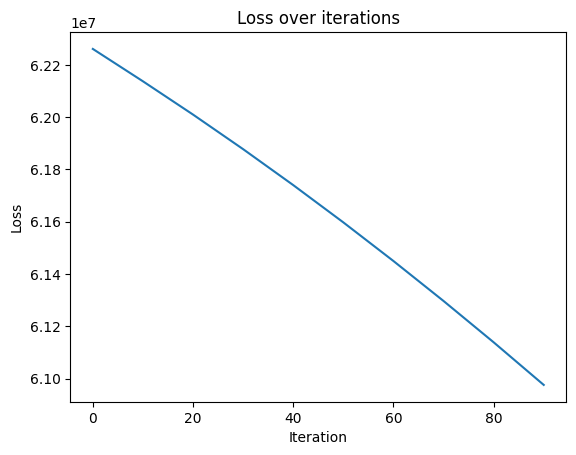

In [28]:
# Plot loss values (optional, requires matplotlib)
import matplotlib.pyplot as plt

plt.plot(range(0, 100, 10), loss_values)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over iterations')
plt.show()

# CYK

In [67]:
grammar = [
    ('S', 'NP', 'VP'),
    ('NP', 'Det', 'Noun'),
    ('NP', 'Noun'),
    ('VP', 'Verb', 'Adv'),
    ('VP', 'Verb', 'NP'),
    ('VP', 'Verb'),
    ('Det', 'the'),
    ('Noun', 'birds'),
    ('Noun', 'sun'),
    ('Noun', 'cars'),
    ('Noun', 'apples'),
    ('Noun', 'books'),
    ('Noun', 'minds'),
    ('Verb', 'fly'),
    ('Verb', 'shines'),
    ('Verb', 'move'),
    ('Verb', 'taste'),
    ('Verb', 'open'),
    ('Adv', 'high'),
    ('Adv', 'brightly'),
    ('Adv', 'fast'),
    ('Adv', 'sweet'),
]

In [77]:
def cyk_parse(sentence, grammar):
    tokens = sentence.split()
    print(tokens)
    n = len(tokens)
    table = [[set() for _ in range(n+1)] for _ in range(n+1)]

    # Initialization
    for i in range(1, n+1):
        for rule in grammar:
            if rule[1] == tokens[i-1]:
                table[i][i].add(rule[0])


    # Rule Application
    for length in range(2, n+1):
        for i in range(1, n-length+2):
            j = i + length - 1
            for k in range(i, j):
                for rule in grammar:
                    if len(rule) == 3:
                        if rule[1] in table[i][k] and rule[2] in table[k+1][j]:
                            table[i][j].add(rule[0])


    print("table[1][n]", table[1][n])
    if 'S' in table[1][n]:
        return True, table
    else:
        return False, table

# Example usage
import string

def remove_punctuation(sentence):
    return sentence.translate(str.maketrans('', '', string.punctuation))

def print_table(table):
    for row in table:
        print(row)

# List of sentences
sentences = [
    "Birds fly high.",
    "The sun shines brightly.",
    "Cars move fast.",
    "Apples taste sweet.",
    "Books open minds."
]

# Apply CYK parsing to each sentence
for sentence in sentences:
    sentence = remove_punctuation(sentence).lower()
    parsed, table = cyk_parse(sentence, grammar)
    print(f"Input sentence: '{sentence}'")
    print("Parse table:")
    print_table(table)
    if parsed:
        print("Sentence parsed successfully.")
    else:
        print("Sentence not parsed.")
    print()



['birds', 'fly', 'high']
table[1][n] set()
Input sentence: 'birds fly high'
Parse table:
[set(), set(), set(), set()]
[set(), {'Noun'}, set(), set()]
[set(), set(), {'Verb'}, {'VP'}]
[set(), set(), set(), {'Adv'}]
Sentence not parsed.

['the', 'sun', 'shines', 'brightly']
table[1][n] {'S'}
Input sentence: 'the sun shines brightly'
Parse table:
[set(), set(), set(), set(), set()]
[set(), {'Det'}, {'NP'}, set(), {'S'}]
[set(), set(), {'Noun'}, set(), set()]
[set(), set(), set(), {'Verb'}, {'VP'}]
[set(), set(), set(), set(), {'Adv'}]
Sentence parsed successfully.

['cars', 'move', 'fast']
table[1][n] set()
Input sentence: 'cars move fast'
Parse table:
[set(), set(), set(), set()]
[set(), {'Noun'}, set(), set()]
[set(), set(), {'Verb'}, {'VP'}]
[set(), set(), set(), {'Adv'}]
Sentence not parsed.

['apples', 'taste', 'sweet']
table[1][n] set()
Input sentence: 'apples taste sweet'
Parse table:
[set(), set(), set(), set()]
[set(), {'Noun'}, set(), set()]
[set(), set(), {'Verb'}, {'VP'}]
[set

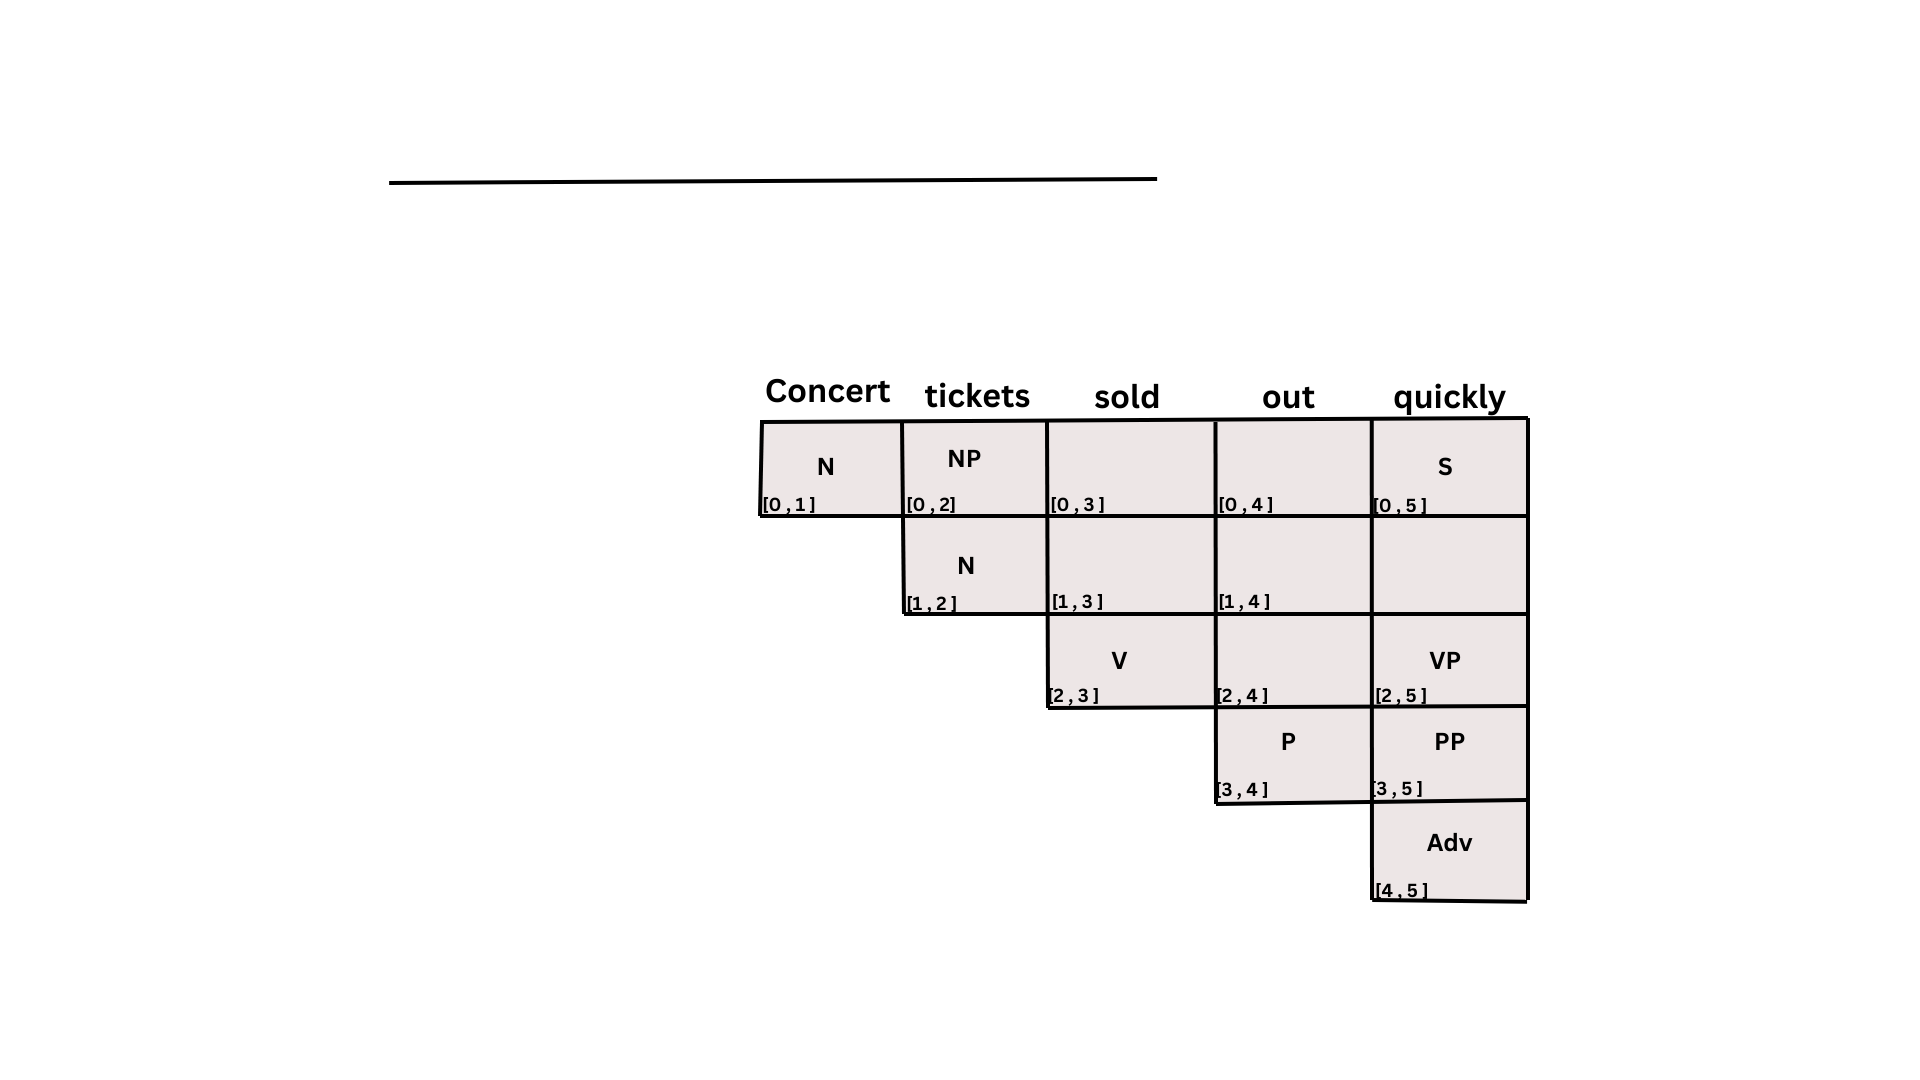

# **WhatsApp Analysis**

In [ ]:
with open('whatsapp.txt', 'r', encoding='utf-8') as file:
    whatsapp_data = file.read()

In [ ]:

import pandas as pd
import re

# Split raw data by newline
lines = whatsapp_data.strip().split('\n')

# Function to extract name and message, and remove name from message
def process_line(line):
    pattern = r'~\s*(.*?):\s*(.*)'
    match = re.search(pattern, line)
    if match:
        name = match.group(1).strip()
        message = match.group(2).strip()
        return name, message
    else:
        return None, line.strip()

# Process each line
data = []
for line in lines:
    name, message = process_line(line)
    if name:
        data.append({'name': name, 'message': message})



In [ ]:
# Create DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)
df.to_csv("/content/whatsapp_data.csv")

# Basic Analysis - Before Processing

In [ ]:
# Combine all text into a single string
all_words = ' '.join(df['message']).lower()

print("---------Before Text Processing-------")
# Total number of messages
total_num_of_data(df)

print_word_statistics(df['message'])

# Average number of words per message
avg_words_per_message(df, 'message')
# 5 most frequent words
most_frequent_words(df, all_words, 5)
# Number of words that only appear once
count_of_words_apear_once(df, all_words)

# Cleaning Data

In [ ]:
df = data_cleaning(df, 'message')
df


In [ ]:
len(df)

In [ ]:
pd.set_option('display.max_colwidth', None)
df
df.to_csv("/content/whatsapp_data_clean.csv", index=False)

# Basic Analysis - After Processing

In [ ]:
# Combine all text into a single string
all_words = ' '.join(df['message']).lower()

print("---------After Text Processing-------")
# Total number of messages
total_num_of_data(df)

print_word_statistics(df['message'])

# Average number of words per message
avg_words_per_message(df, 'message')
# 5 most frequent words
most_frequent_words(df, all_words, 5)
# Number of words that only appear once
count_of_words_apear_once(df, all_words)

# **whatapp tokenazition**

# Word tokenizer

In [ ]:
start_time = time.time()

# Tokenize using NLTK
df['nltk_tokens'] = df['message'].apply(word_tokenize)

nltk_time = time.time() - start_time
print(f"NLTK tokenization time: {nltk_time} seconds")
print(df['nltk_tokens'].head(10))

In [ ]:
import time
# Using list comprehension to flatten the lists in the 'nltk_tokens' column
all_tokens = [token for sublist in df['nltk_tokens'] for token in sublist]

print(all_tokens)

start_time = time.time()

for w in all_tokens:
   (w, " : ", lemmatizer.lemmatize(w, pos='v'))
time = time.time() - start_time
time

In [ ]:
from nltk.stem import PorterStemmer
import time
# NLTK Stemming
def stem_with_nltk(text):
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(w) for w in all_tokens]
    return ' '.join(stemmed_words)

start_time = time.time()
stemmed_words = stem_with_nltk(all_tokens)
nltk_time = time.time() - start_time

print("Stemmed dataframe using NLTK:")
print(stemmed_words)
print(f"Stemming time using NLTK: {nltk_time:.6f} seconds")